# Experimento 3: _GridSearch_ no SVM

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Busca em grade

In [2]:
fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

grid = {'svc__C':[0.5, 1, 1.5, 2, 2.5],
        'svc__gamma':['scale', 'auto', 0.01, 0.1, 0.25, 0.5, 1, 1.5]}

results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=grid,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_df = pd.DataFrame(results)
results_df.to_csv('./csvs/06-gs_svm.csv')
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.319313,0.020221,0.037835,0.001913,0.5,scale,"{'svc__C': 0.5, 'svc__gamma': 'scale'}",0.838462,0.803089,0.837838,0.876448,0.799228,0.822394,0.806950,0.884170,0.830116,0.814672,0.831337,0.027753,34
1,0.316029,0.015275,0.038811,0.002019,0.5,auto,"{'svc__C': 0.5, 'svc__gamma': 'auto'}",0.838462,0.803089,0.837838,0.876448,0.799228,0.822394,0.806950,0.884170,0.830116,0.814672,0.831337,0.027753,34
2,0.539317,0.057706,0.045757,0.004915,0.5,0.01,"{'svc__C': 0.5, 'svc__gamma': 0.01}",0.550000,0.517375,0.559846,0.598456,0.567568,0.555985,0.505792,0.567568,0.540541,0.586873,0.555000,0.027048,40
3,0.389047,0.082372,0.049144,0.012890,0.5,0.1,"{'svc__C': 0.5, 'svc__gamma': 0.1}",0.853846,0.833977,0.868726,0.903475,0.837838,0.845560,0.853282,0.895753,0.849421,0.861004,0.860288,0.021946,33
4,0.263748,0.014163,0.034051,0.004154,0.5,0.25,"{'svc__C': 0.5, 'svc__gamma': 0.25}",0.896154,0.915058,0.922780,0.945946,0.884170,0.907336,0.915058,0.907336,0.911197,0.953668,0.915870,0.019858,25
5,0.309823,0.035822,0.033751,0.012038,0.5,0.5,"{'svc__C': 0.5, 'svc__gamma': 0.5}",0.965385,0.930502,0.942085,0.969112,0.926641,0.972973,0.938224,0.972973,0.957529,0.988417,0.956384,0.019773,19
6,0.539094,0.113845,0.051846,0.020301,0.5,1,"{'svc__C': 0.5, 'svc__gamma': 1}",0.976923,0.953668,0.953668,0.976834,0.945946,0.984556,0.957529,0.988417,0.969112,0.988417,0.969507,0.015003,16
7,0.689855,0.096840,0.039705,0.012779,0.5,1.5,"{'svc__C': 0.5, 'svc__gamma': 1.5}",0.980769,0.972973,0.953668,0.976834,0.949807,0.980695,0.957529,0.992278,0.969112,0.988417,0.972208,0.013797,14
8,0.461479,0.090007,0.062392,0.013013,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.857692,0.857143,0.884170,0.915058,0.845560,0.872587,0.861004,0.934363,0.868726,0.891892,0.878819,0.026605,31
9,0.445255,0.078058,0.072029,0.026621,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.857692,0.857143,0.884170,0.915058,0.845560,0.872587,0.861004,0.934363,0.868726,0.891892,0.878819,0.026605,31


params,mean_test_score,std_test_score,rank_test_score
"{'svc__C': 0.5, 'svc__gamma': 'scale'}",0.831337,0.027753,34
"{'svc__C': 0.5, 'svc__gamma': 'auto'}",0.831337,0.027753,34
"{'svc__C': 0.5, 'svc__gamma': 0.01}",0.555000,0.027048,40
"{'svc__C': 0.5, 'svc__gamma': 0.1}",0.860288,0.021946,33
"{'svc__C': 0.5, 'svc__gamma': 0.25}",0.915870,0.019858,25
"{'svc__C': 0.5, 'svc__gamma': 0.5}",0.956384,0.019773,19
"{'svc__C': 0.5, 'svc__gamma': 1}",0.969507,0.015003,16
"{'svc__C': 0.5, 'svc__gamma': 1.5}",0.972208,0.013797,14
"{'svc__C': 1, 'svc__gamma': 'scale'}",0.878819,0.026605,31
"{'svc__C': 1, 'svc__gamma': 'auto'}",0.878819,0.026605,31


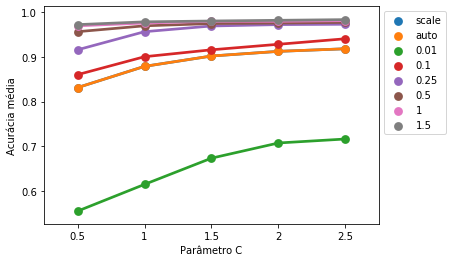

In [3]:
sns.pointplot(
    data=results_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_df[[
    'params',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()